# Crop Plantation Survival Classification 

In [54]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [55]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df = pd.concat([df_train.assign(ind="train"), df_test.assign(ind="test")])

In [56]:
#exploring the first 10 rows of the data
df_train.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
5,F00000008,448,0,1,1,0,NaN,0,2,1
6,F00000009,448,0,1,1,0,NaN,0,2,1
7,F00000010,577,1,0,1,0,0.0,0,1,2
8,F00000012,731,0,0,1,0,0.0,0,2,0
9,F00000020,1132,1,0,1,0,0.0,0,1,2


## Data Preprocessing 

In [57]:
#Exploring the variables
df.shape

(148168, 11)

In [58]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage', 'ind'],
      dtype='object')

In [59]:
# Move the reponse variable 'crop_damage' to the front of the table
front = df['Crop_Damage']

# drop(colume name list , axis: 0  for index 1 for columns, inplace means permanent change)
df.drop(labels=['Crop_Damage'], axis=1,inplace = True)

# insert( insert column location, column to be inserted , values)
df.insert(1, 'Crop_Damage', front)
df.head(10)

,ID,Crop_Damage,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,ind
0,F00000001,0.0,188,1,0,1,0,0.0,0,1,train
1,F00000003,1.0,209,1,0,1,0,0.0,0,2,train
2,F00000004,1.0,257,1,0,1,0,0.0,0,2,train
3,F00000005,1.0,257,1,1,1,0,0.0,0,2,train
4,F00000006,1.0,342,1,0,1,0,0.0,0,2,train
5,F00000008,1.0,448,0,1,1,0,NaN,0,2,train
6,F00000009,1.0,448,0,1,1,0,NaN,0,2,train
7,F00000010,2.0,577,1,0,1,0,0.0,0,1,train
8,F00000012,0.0,731,0,0,1,0,0.0,0,2,train
9,F00000020,2.0,1132,1,0,1,0,0.0,0,1,train


In [60]:
#checking if null values are present in any of the columns
df.isna().sum()

ID                             0
Crop_Damage                59310
Estimated_Insects_Count        0
Crop_Type                      0
Soil_Type                      0
Pesticide_Use_Category         0
Number_Doses_Week              0
Number_Weeks_Used          14893
Number_Weeks_Quit              0
Season                         0
ind                            0
dtype: int64

Number_Weeks_Used has 14893 missing values. The missing values are imputated with the median of the column.

In [61]:
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].median(),inplace=True)
#check if the missing value is replaced
df.isna().sum()

ID                             0
Crop_Damage                59310
Estimated_Insects_Count        0
Crop_Type                      0
Soil_Type                      0
Pesticide_Use_Category         0
Number_Doses_Week              0
Number_Weeks_Used              0
Number_Weeks_Quit              0
Season                         0
ind                            0
dtype: int64

The missing Crop_Damage values are from the test values which are to be predicted.  

In [62]:
df_test.shape

(59310, 9)

In [63]:
#Number of Unique Values in each column
df.nunique()

ID                         148168
Crop_Damage                     3
Estimated_Insects_Count        71
Crop_Type                       2
Soil_Type                       2
Pesticide_Use_Category          3
Number_Doses_Week              20
Number_Weeks_Used              64
Number_Weeks_Quit              51
Season                          3
ind                             2
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148168 entries, 0 to 59309
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       148168 non-null  object 
 1   Crop_Damage              88858 non-null   float64
 2   Estimated_Insects_Count  148168 non-null  int64  
 3   Crop_Type                148168 non-null  int64  
 4   Soil_Type                148168 non-null  int64  
 5   Pesticide_Use_Category   148168 non-null  int64  
 6   Number_Doses_Week        148168 non-null  int64  
 7   Number_Weeks_Used        148168 non-null  float64
 8   Number_Weeks_Quit        148168 non-null  int64  
 9   Season                   148168 non-null  int64  
 10  ind                      148168 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 13.6+ MB


In [65]:
#Dropping ID column as it is irrelevant for analysis 
df = df.drop('ID', axis=1)

In [66]:
df_test, df_train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]
df_train = df_train.drop('ind', axis=1)
df_test = df_test.drop('ind', axis=1)
df_train

,Crop_Damage,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0.0,188,1,0,1,0,0.0,0,1
1,1.0,209,1,0,1,0,0.0,0,2
2,1.0,257,1,0,1,0,0.0,0,2
3,1.0,257,1,1,1,0,0.0,0,2
4,1.0,342,1,0,1,0,0.0,0,2
...,...,...,...,...,...,...,...,...,...
88853,0.0,3337,1,0,2,10,12.0,44,3
88854,0.0,3516,1,0,2,10,20.0,38,1
88855,0.0,3516,1,0,2,15,40.0,8,2
88856,0.0,3702,1,0,2,10,25.0,18,3


In [67]:
#data statistics
df_train.describe()

,Crop_Damage,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,0.190562,1399.012210,0.284375,0.458417,2.264186,25.849952,28.560771,9.589986,1.896959
std,0.454215,849.048781,0.451119,0.498271,0.461772,15.554428,11.749075,9.900631,0.701322
min,0.000000,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,0.000000,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000
75%,0.000000,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000
max,2.000000,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


In [68]:
#Exploring the Crop Damage column (Types of Crop Damage - 0 => alive, 1 => Damage due to other causes, 2 => Damage due to Pesticides))
df_train['Crop_Damage'].value_counts()

0.0    74238
1.0    12307
2.0     2313
Name: Crop_Damage, dtype: int64

In [69]:
df_train.groupby('Crop_Damage').mean()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Crop_Damage,,,,,,,,
0.0,1315.707387,0.289070,0.463334,2.229586,26.119238,27.415299,10.110644,1.897236
1.0,1839.106200,0.252133,0.435037,2.416592,24.176079,33.921508,7.630698,1.894044
2.0,1731.111976,0.305231,0.424989,2.563770,26.113273,36.802421,3.303934,1.903588


In [70]:
df_train.groupby('Crop_Type').mean()

,Crop_Damage,Estimated_Insects_Count,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Crop_Type,,,,,,,,
0,0.195285,1446.555977,0.548680,2.195553,27.734121,28.869852,11.046628,1.896004
1,0.178677,1279.369148,0.231272,2.436899,21.108473,27.782975,5.924374,1.899363


In [71]:
df_train.groupby('Soil_Type').mean()

,Crop_Damage,Estimated_Insects_Count,Crop_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Soil_Type,,,,,,,,
0,0.199755,1443.049019,0.403645,2.250312,24.713033,29.277512,9.504696,1.895458
1,0.179702,1346.986203,0.143467,2.280576,27.193131,27.713998,9.690750,1.898733


In [72]:
df_train.groupby('Season').mean()

,Crop_Damage,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
Season,,,,,,,,
1,0.188462,1394.991673,0.283734,0.457661,2.263103,25.881719,28.463274,9.600810
2,0.193237,1401.148224,0.283782,0.457702,2.263673,25.842004,28.610654,9.568514
3,0.187084,1399.785755,0.286825,0.461343,2.267102,25.821594,28.584301,9.627071


### Quick Observations 

(i) The average insects count for crop 1 seems to be the highest for crop damage type 1, which is damage due to reason other than pesticide. This damage could be due to high number of insects. \
(ii) Crop Type 0 appears to have the highest damage as it has the highest insect count and highest number of doses and number of weeks of pesticide use.\
(iii) Soil type 0 has the highest crop damage. \
(iv) The average crop damage and insects count for season 2 seems to be the highest for crop damage. This damage could be due to high number of insects as well as the weather condition. 

## Exploratory Data Analysis 

### Crop Damage Count by Crop Type

Text(0.5, 1.0, 'Crop Damage by Crop Type')

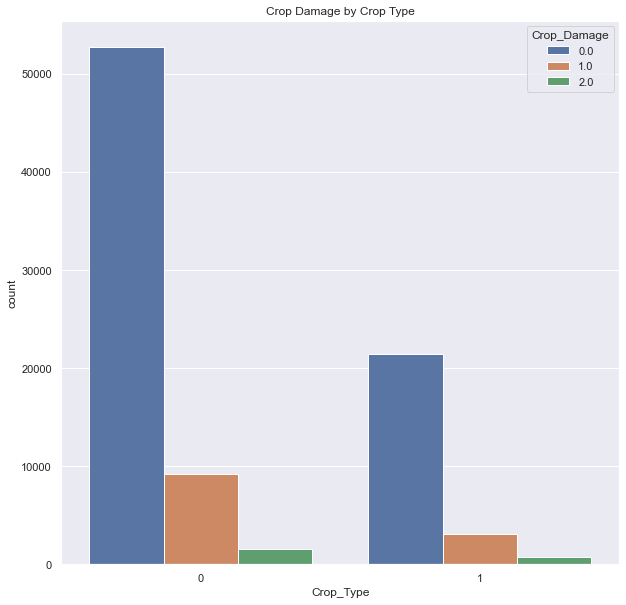

In [73]:
sns.countplot(x='Crop_Type', hue='Crop_Damage', data=df_train).set_title('Crop Damage by Crop Type')

Crop damage due to other reason is higher in both crop type 0 and 1 compared to crop damage due to pesticide. \
Overall, crop type 0 has a higher chance of survival compared to crop type 1. 

### Pesticide Use Categrory Analysis 


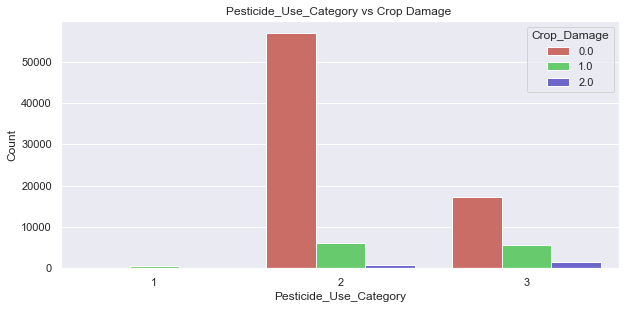

In [74]:
pd.crosstab(df_train.Pesticide_Use_Category, df_train.Crop_Damage)
#Plotting the result
plt.subplot(2,1,1)
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot("Pesticide_Use_Category",data=df_train,hue="Crop_Damage", palette="hls")
plt.ylabel("Count")
plt.xlabel("Pesticide_Use_Category")
plt.title("Pesticide_Use_Category vs Crop Damage ")
plt.show()

From the plot above, it can be seen that crops have highest chance of survival when pesticide 2 is used.\
Pesticide 1 has no effect on the survival of the crops.\
Pesticide 3 has the highest pesticide related damage to the crops. 

### Number of Insects vs Crop Damage 

<AxesSubplot:xlabel='Crop_Damage', ylabel='Estimated_Insects_Count'>

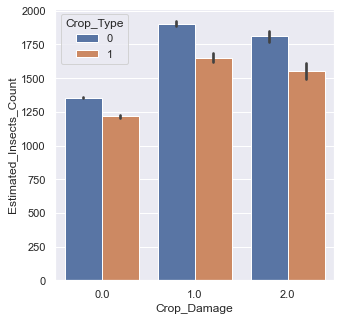

In [75]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='Crop_Damage', y='Estimated_Insects_Count', data=df_train, hue='Crop_Type')

Crop type 0 has the highest number of insects count and it appears to be one of the contributing factors for damage due to other reasons. 

### Crop Damage by Season 


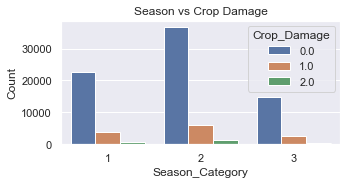

In [76]:
pd.crosstab(df_train.Season, df_train.Crop_Damage)
plt.subplot(2,1,1)
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot("Season",data=df_train,hue="Crop_Damage")
plt.ylabel("Count")
plt.xlabel("Season_Category")
plt.title("Season vs Crop Damage")
plt.show()

The damage to the crops due to other reasons and pesticide is the highest in season 2. 

### Crop Damage by Soil Type 

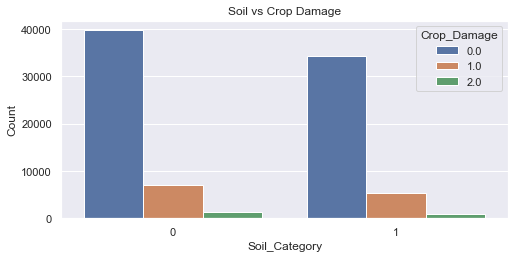

In [77]:
pd.crosstab(df_train.Soil_Type, df_train.Crop_Damage)
plt.subplot(2,1,1)
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot("Soil_Type",data=df_train,hue="Crop_Damage")
plt.ylabel("Count")
plt.xlabel("Soil_Category")
plt.title("Soil vs Crop Damage")
plt.show()

Damage to the crops due to reasons other than pesticide is higher in soil category 0. At the same time, 
damage due to pesticide is also slight higher in soil type 0. 

### Week Number and Damage

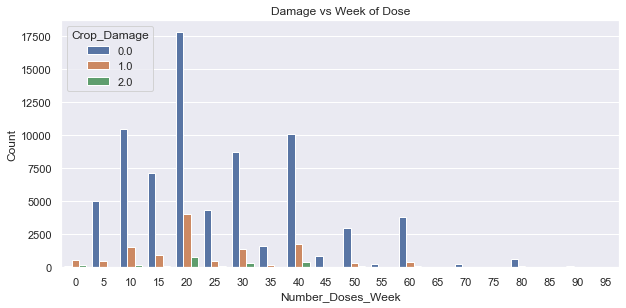

In [78]:
pd.crosstab(df_train.Number_Doses_Week, df_train.Crop_Damage)
sns.set(rc={'figure.figsize':(10,10)})
plt.subplot(2,1,1)
sns.countplot("Number_Doses_Week",data=df_train,hue="Crop_Damage")
plt.ylabel("Count")
plt.xlabel("Number_Doses_Week")
plt.title("Damage vs Week of Dose")
plt.show()

Crops appears to have the high survival rate when pesticide is used between weeks 5 and 10.

#### Damage vs Number of Weeks Pesticide is Used

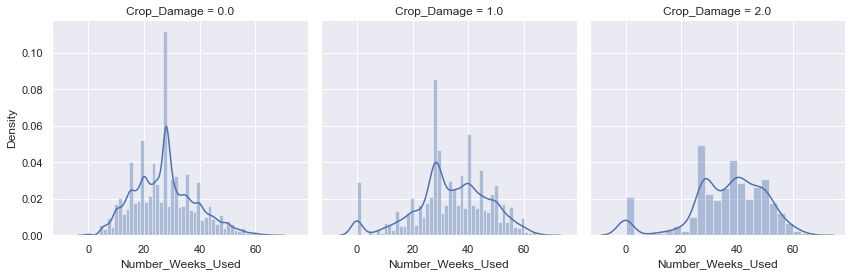

In [79]:
fert_use = sns.FacetGrid(df_train, col='Crop_Damage',size=4)
fert_use = fert_use.map(sns.distplot, "Number_Weeks_Used")
plt.show()

From the plots above, survival of crops declines significantly after 20 weeks of fertilizer use. \
Damage to the crops due to pesticide use appears to be the highest after 20 weeks of constant use. 

### Detecting Outliers 

Outliers in the attributes are detected with the help of a box plot. 

Crop_Damage                    AxesSubplot(0.125,0.71587;0.168478x0.16413)
Estimated_Insects_Count     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Crop_Type                   AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Soil_Type                   AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Pesticide_Use_Category        AxesSubplot(0.125,0.518913;0.168478x0.16413)
Number_Doses_Week          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Number_Weeks_Used          AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Number_Weeks_Quit          AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Season                        AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

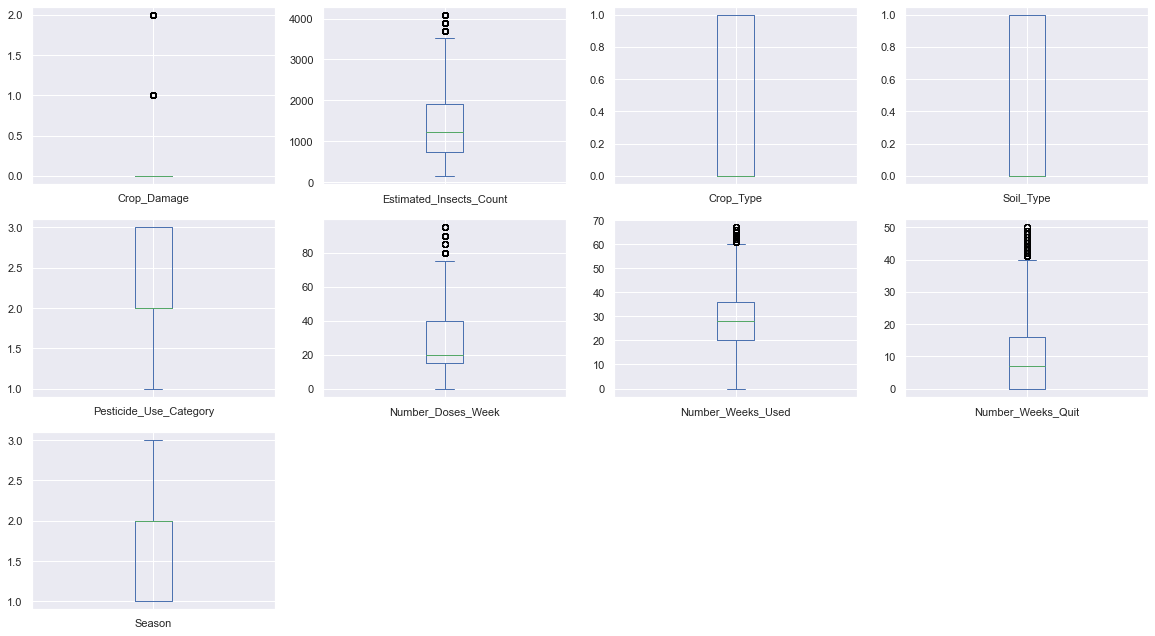

In [80]:
df_train.plot(kind="box",subplots=True,layout=(4,4),figsize=(20,15))

The attributes Estimated_Insects_Count, Number_Doses_Week, Number_Weeks_Used and Number_Weeks_Quit have a high number of outliers. These outlier values are replaced with the median values of their respective attributes. 

In [81]:
df_train.loc[df_train['Number_Weeks_Used']>55,'Number_Weeks_Used'] = np.median(df_train["Number_Weeks_Used"])
df_train.loc[df_train['Estimated_Insects_Count']>3500,'Estimated_Insects_Count'] = np.median(df_train["Estimated_Insects_Count"])
df_train.loc[df_train['Number_Weeks_Quit']>40,'Number_Weeks_Quit'] = np.median(df_train["Number_Weeks_Quit"])
df_train.loc[df_train['Number_Doses_Week']>80,'Number_Doses_Week'] = np.median(df_train["Number_Doses_Week"])

Crop_Damage                    AxesSubplot(0.125,0.71587;0.168478x0.16413)
Estimated_Insects_Count     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Crop_Type                   AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Soil_Type                   AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Pesticide_Use_Category        AxesSubplot(0.125,0.518913;0.168478x0.16413)
Number_Doses_Week          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Number_Weeks_Used          AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Number_Weeks_Quit          AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Season                        AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

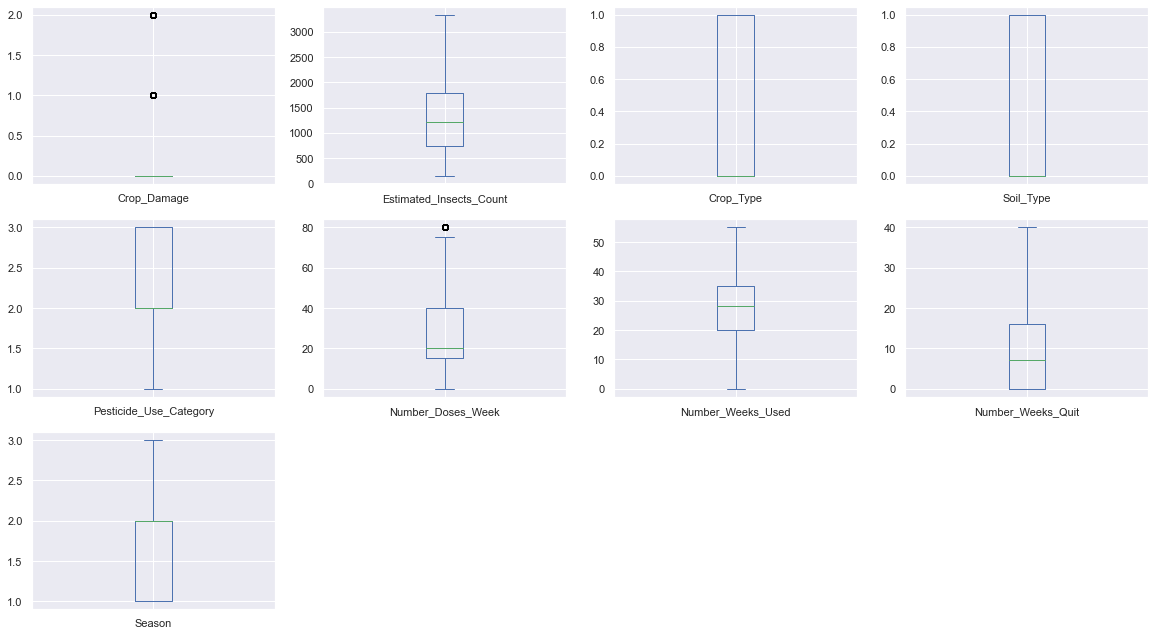

In [82]:
df_train.plot(kind="box",subplots=True,layout=(4,4),figsize=(20,15))

The outliers in the attributes have been succesfully removed. 

### Correlation Heatmap 

Text(0.5, 1.0, 'Correlation Heatmap between the Attributes')

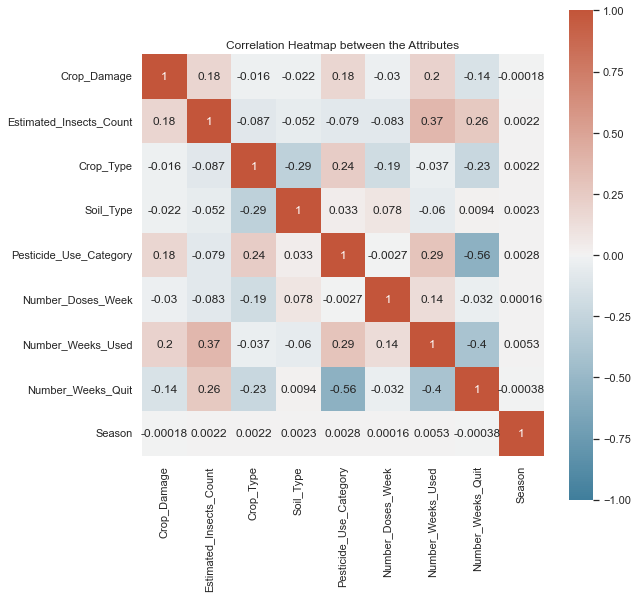

In [83]:
fig, ax = plt.subplots(figsize=(9, 9))
cmap= sns.diverging_palette(230,20,as_cmap=True)
#pearson_corr_coff
corr_p = df_train.corr()
sns.heatmap(corr_p, square=True, cmap=cmap, vmin= -1, vmax = 1, annot=True).set_title('Correlation Heatmap between the Attributes')

General Observations

Estimated_Insects_count, Pesticide_use_category and Number_weeks_used have very weak positive correlation with Crop damage.

Estimated_Insects_count and Pesticide_use_category have very weak positive correlation with Number_weeks_used.

Pesticide_use_category and Number_weeks_used have moderate negative correlation with Number_weeks_Quit. 

## Feature Transformation - Categorical to Numerical 

In [84]:
#Binary classification of the numerical attributes 
df_train['Estimated_Insects_Count'] = np.log(df_train['Estimated_Insects_Count'])
df_test['Estimated_Insects_Count'] = np.log(df_test['Estimated_Insects_Count'])
df_train['Number_Doses_Week'] = np.where(df_train['Number_Doses_Week']>20,1,0)
df_test['Number_Doses_Week'] = np.where(df_test['Number_Doses_Week']>20,1,0)
df_train['Number_Weeks_Used'] = np.where(df_train['Number_Weeks_Used']>36,1,0)
df_test['Number_Weeks_Used'] = np.where(df_test['Number_Weeks_Used']>36,1,0)
df_train['Number_Weeks_Quit'] = np.where(df_train['Number_Weeks_Quit']>7,1,0)
df_test['Number_Weeks_Quit'] = np.where(df_test['Number_Weeks_Quit']>7,1,0)

In [85]:
#Generating dummy variables for the categorical attributes 
df_train = pd.get_dummies(df_train, columns=["Crop_Type","Soil_Type","Pesticide_Use_Category","Season"],
                         prefix=["Crop","Soil","Pesticide","Season"], drop_first=False)
df_test = pd.get_dummies(df_test, columns=["Crop_Type","Soil_Type","Pesticide_Use_Category","Season"],
                         prefix=["Crop","Soil","Pesticide","Season"], drop_first=False)

In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88858 entries, 0 to 88857
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Crop_Damage              88858 non-null  float64
 1   Estimated_Insects_Count  88858 non-null  float64
 2   Number_Doses_Week        88858 non-null  int32  
 3   Number_Weeks_Used        88858 non-null  int32  
 4   Number_Weeks_Quit        88858 non-null  int32  
 5   Crop_0                   88858 non-null  uint8  
 6   Crop_1                   88858 non-null  uint8  
 7   Soil_0                   88858 non-null  uint8  
 8   Soil_1                   88858 non-null  uint8  
 9   Pesticide_1              88858 non-null  uint8  
 10  Pesticide_2              88858 non-null  uint8  
 11  Pesticide_3              88858 non-null  uint8  
 12  Season_1                 88858 non-null  uint8  
 13  Season_2                 88858 non-null  uint8  
 14  Season_3              

In [87]:
#Changing the data type of categorical variables 
columns =['Crop_0','Crop_1','Soil_0','Soil_1','Pesticide_1','Pesticide_2','Pesticide_3','Season_1','Season_2','Season_3']
for col in columns:
    df_train[col] = df_train[col].astype('category')
    df_test[col] = df_test[col].astype('category')
    df_train[col] = df_train[col].cat.codes.astype("int16")
    df_test[col] = df_test[col].cat.codes.astype("int16")

In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88858 entries, 0 to 88857
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Crop_Damage              88858 non-null  float64
 1   Estimated_Insects_Count  88858 non-null  float64
 2   Number_Doses_Week        88858 non-null  int32  
 3   Number_Weeks_Used        88858 non-null  int32  
 4   Number_Weeks_Quit        88858 non-null  int32  
 5   Crop_0                   88858 non-null  int16  
 6   Crop_1                   88858 non-null  int16  
 7   Soil_0                   88858 non-null  int16  
 8   Soil_1                   88858 non-null  int16  
 9   Pesticide_1              88858 non-null  int16  
 10  Pesticide_2              88858 non-null  int16  
 11  Pesticide_3              88858 non-null  int16  
 12  Season_1                 88858 non-null  int16  
 13  Season_2                 88858 non-null  int16  
 14  Season_3              

In [89]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59310 entries, 0 to 59309
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Crop_Damage              0 non-null      float64
 1   Estimated_Insects_Count  59310 non-null  float64
 2   Number_Doses_Week        59310 non-null  int32  
 3   Number_Weeks_Used        59310 non-null  int32  
 4   Number_Weeks_Quit        59310 non-null  int32  
 5   Crop_0                   59310 non-null  int16  
 6   Crop_1                   59310 non-null  int16  
 7   Soil_0                   59310 non-null  int16  
 8   Soil_1                   59310 non-null  int16  
 9   Pesticide_1              59310 non-null  int16  
 10  Pesticide_2              59310 non-null  int16  
 11  Pesticide_3              59310 non-null  int16  
 12  Season_1                 59310 non-null  int16  
 13  Season_2                 59310 non-null  int16  
 14  Season_3              

### Separating the dependent and independent variables for model fitting

In [90]:
X = df_train.drop('Crop_Damage', axis=1)
y = df_train['Crop_Damage']

In [91]:
X

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_0,Crop_1,Soil_0,Soil_1,Pesticide_1,Pesticide_2,Pesticide_3,Season_1,Season_2,Season_3
0,5.236442,0,0,0,0,1,1,0,1,0,0,1,0,0
1,5.342334,0,0,0,0,1,1,0,1,0,0,0,1,0
2,5.549076,0,0,0,0,1,1,0,1,0,0,0,1,0
3,5.549076,0,0,0,0,1,0,1,1,0,0,0,1,0
4,5.834811,0,0,0,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88853,8.112827,0,0,0,0,1,1,0,0,1,0,0,0,1
88854,7.100027,0,0,1,0,1,1,0,0,1,0,1,0,0
88855,7.100027,0,1,1,0,1,1,0,0,1,0,0,1,0
88856,7.100027,0,0,1,0,1,1,0,0,1,0,0,0,1


In [92]:
#Standardizing every column using Standar Scaler to improve performance
from sklearn.preprocessing import StandardScaler 
standard = StandardScaler()
stan_x = standard.fit_transform(X)
df_stan_x = pd.DataFrame(stan_x, columns=X.columns)
df_stan_x

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_0,Crop_1,Soil_0,Soil_1,Pesticide_1,Pesticide_2,Pesticide_3,Season_1,Season_2,Season_3
0,-2.724326,-0.894561,-0.541579,-0.967007,-1.586343,1.586343,0.920021,-0.920021,10.254876,-1.591622,-0.613728,1.517572,-0.995083,-0.499550
1,-2.561721,-0.894561,-0.541579,-0.967007,-1.586343,1.586343,0.920021,-0.920021,10.254876,-1.591622,-0.613728,-0.658947,1.004941,-0.499550
2,-2.244256,-0.894561,-0.541579,-0.967007,-1.586343,1.586343,0.920021,-0.920021,10.254876,-1.591622,-0.613728,-0.658947,1.004941,-0.499550
3,-2.244256,-0.894561,-0.541579,-0.967007,-1.586343,1.586343,-1.086932,1.086932,10.254876,-1.591622,-0.613728,-0.658947,1.004941,-0.499550
4,-1.805492,-0.894561,-0.541579,-0.967007,-1.586343,1.586343,0.920021,-0.920021,10.254876,-1.591622,-0.613728,-0.658947,1.004941,-0.499550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88853,1.692550,-0.894561,-0.541579,-0.967007,-1.586343,1.586343,0.920021,-0.920021,-0.097515,0.628290,-0.613728,-0.658947,-0.995083,2.001802
88854,0.137330,-0.894561,-0.541579,1.034118,-1.586343,1.586343,0.920021,-0.920021,-0.097515,0.628290,-0.613728,1.517572,-0.995083,-0.499550
88855,0.137330,-0.894561,1.846453,1.034118,-1.586343,1.586343,0.920021,-0.920021,-0.097515,0.628290,-0.613728,-0.658947,1.004941,-0.499550
88856,0.137330,-0.894561,-0.541579,1.034118,-1.586343,1.586343,0.920021,-0.920021,-0.097515,0.628290,-0.613728,-0.658947,-0.995083,2.001802


#### Splitting the Data for Testing and Training 

In [93]:
#Splitting the training data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_stan_x,y, test_size = 0.2, random_state=42)

## Fitting the models

#### Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_score_train = decision_tree_model.score(X_train, y_train)
print(f"The accuracy score of Decision Tree Classifier on training data is {decision_score_train}.")

The accuracy score of Decision Tree Classifier on training data is 0.8514475424134147.


In [95]:
decision_score_test = decision_tree_model.score(X_test, y_test)
print(f"The accuracy score of Logistic Regression on test data is {decision_score_test}.")

The accuracy score of Logistic Regression on test data is 0.8290569435066396.


#### Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [97]:
rf_score_train = random_forest_model.score(X_train, y_train)
print(f"The accuracy score of Random Forest Classifier on training data is {rf_score_train}.")

The accuracy score of Random Forest Classifier on training data is 0.8514475424134147.


In [98]:
rf_score_test = random_forest_model.score(X_test, y_test)
print(f"The accuracy score of Random Forest on test data is {rf_score_test}.")

The accuracy score of Random Forest on test data is 0.8272000900292595.


#### K-Nearest Neighbors

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [100]:
knn_score_train = knn_model.score(X_train, y_train)
print(f"The accuracy score of KNN Classifier on training data is {knn_score_train}.")

The accuracy score of KNN Classifier on training data is 0.837394142306502.


In [101]:
knn_score_test = knn_model.score(X_test, y_test)
print(f"The accuracy score of KNN on test data is {knn_score_test}.")

The accuracy score of KNN on test data is 0.8232050416385325.


#### Gaussian Naive Bayes 

In [102]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)

GaussianNB()

In [103]:
gnb_score_train = gnb_model.score(X_train, y_train)
print(f"The accuracy score of Gaussian Naive Bayes Classifier on training data is {gnb_score_train}.")

The accuracy score of Gaussian Naive Bayes Classifier on training data is 0.8241988577216329.


In [104]:
gnb_score_test = gnb_model.score(X_test, y_test)
print(f"The accuracy score of Gaussain Naive Bayes on test data is {gnb_score_test}.")

The accuracy score of Gaussain Naive Bayes on test data is 0.8181408957911321.


### Model Evaluation

Constructing a confusion matrix for all the classifier models used 

In [106]:
from sklearn.metrics import classification_report 

#### Decision Tree

In [107]:
print(classification_report(y_test, decision_tree_model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     14803
         1.0       0.40      0.10      0.17      2499
         2.0       0.15      0.01      0.02       470

    accuracy                           0.83     17772
   macro avg       0.47      0.36      0.37     17772
weighted avg       0.77      0.83      0.78     17772



Text(0.5, 1.0, 'Decision Tree')

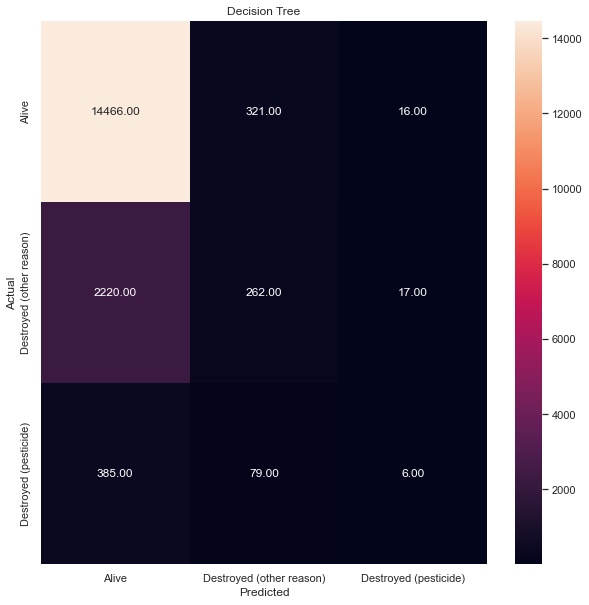

In [108]:
y_pred = decision_tree_model.predict(X_test)
from sklearn.metrics import confusion_matrix
dt_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(dt_cm, annot=True, fmt='.2f',xticklabels = ["Alive", "Destroyed (other reason)", "Destroyed (pesticide)"] , yticklabels = ["Alive", "Destroyed (other reason)", "Destroyed (pesticide)"])
sns.set(rc={'figure.figsize':(4,4)})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Decision Tree')

#### Random Forest 

              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91     14803
         1.0       0.39      0.12      0.19      2499
         2.0       0.12      0.02      0.03       470

    accuracy                           0.83     17772
   macro avg       0.45      0.37      0.38     17772
weighted avg       0.77      0.83      0.78     17772



Text(0.5, 1.0, 'Random Forest Classifier')

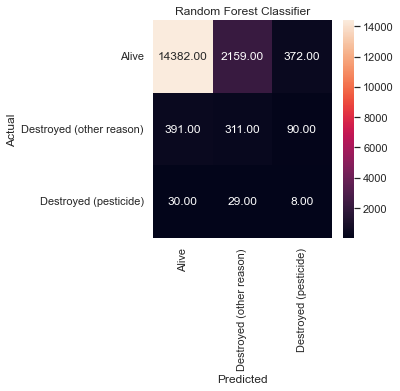

In [109]:
print(classification_report(y_test, random_forest_model.predict(X_test)))
y_pred = random_forest_model.predict(X_test)
from sklearn.metrics import confusion_matrix
random_f_cm = confusion_matrix(y_pred, y_test)
sns.heatmap(random_f_cm, annot=True, fmt='.2f',xticklabels = ["Alive", "Destroyed (other reason)", "Destroyed (pesticide)"] , yticklabels = ["Alive", "Destroyed (other reason)", "Destroyed (pesticide)"])
sns.set(rc={'figure.figsize':(4,4)})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Classifier')

#### K-Nearest Neighbours

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     14803
         1.0       0.38      0.17      0.23      2499
         2.0       0.15      0.01      0.02       470

    accuracy                           0.82     17772
   macro avg       0.46      0.38      0.39     17772
weighted avg       0.77      0.82      0.79     17772



Text(0.5, 1.0, 'K-Nearest Neighbours Classifier')

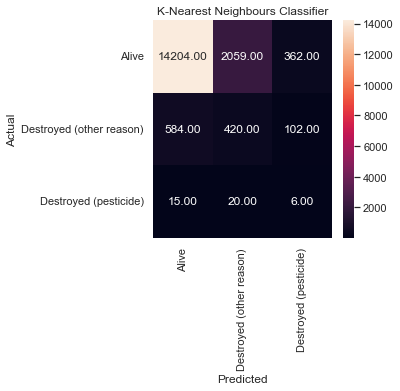

In [110]:
print(classification_report(y_test, knn_model.predict(X_test)))
y_pred = knn_model.predict(X_test)
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_pred, y_test)
sns.heatmap(knn_cm, annot=True, fmt='.2f',xticklabels = ["Alive", "Destroyed (other reason)", "Destroyed (pesticide)"] , yticklabels = ["Alive", "Destroyed (other reason)", "Destroyed (pesticide)"])
sns.set(rc={'figure.figsize':(4,4)})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('K-Nearest Neighbours Classifier')

#### Gaussian Naive Bayes 

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91     14803
         1.0       0.37      0.15      0.21      2499
         2.0       0.12      0.09      0.10       470

    accuracy                           0.82     17772
   macro avg       0.45      0.40      0.41     17772
weighted avg       0.77      0.82      0.79     17772



Text(0.5, 1.0, 'Gaussian Naive Bayes Classifier')

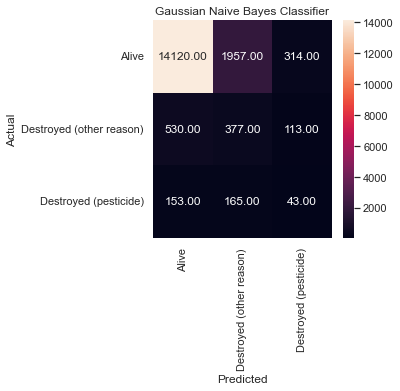

In [111]:
print(classification_report(y_test, gnb_model.predict(X_test)))
y_pred = gnb_model.predict(X_test)
from sklearn.metrics import confusion_matrix
gnb_cm = confusion_matrix(y_pred, y_test)
sns.heatmap(gnb_cm, annot=True, fmt='.2f',xticklabels = ["Alive", "Destroyed (other reason)", "Destroyed (pesticide)"] , yticklabels = ["Alive", "Destroyed (other reason)", "Destroyed (pesticide)"])
sns.set(rc={'figure.figsize':(4,4)})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Gaussian Naive Bayes Classifier')

Because of the nature of the data, all the classifiers are mostly accurate in predicting the crop damage type 0 (alive) compared to crop damage 1 (damage due to other reasons) and crop damage 2 (damage due to pesticides).   

So, an extreme gradient boosting classifier is applied to boost the accuracy of prediction of different crop damage type.

In [112]:
from xgboost import XGBClassifier

In [113]:
xgb_model = XGBClassifier(verbosity = 0, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=0)

In [114]:
xgb_score_train = xgb_model.score(X_train, y_train)
print(f"The accuracy score of XGB Classifier on training data is {xgb_score_train}.")

The accuracy score of XGB Classifier on training data is 0.8447092254452353.


In [115]:
xgb_score_test = xgb_model.score(X_test, y_test)
print(f"The accuracy score of XGB classifier on test data is {xgb_score_test}.")

The accuracy score of XGB classifier on test data is 0.8358091379698402.


#### Confusion Matrix of Boosted Classifier

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91     14803
         1.0       0.48      0.08      0.14      2499
         2.0       0.33      0.01      0.02       470

    accuracy                           0.84     17772
   macro avg       0.55      0.36      0.36     17772
weighted avg       0.78      0.84      0.78     17772



Text(0.5, 1.0, 'Extreme Gradient Boosting Classifier')

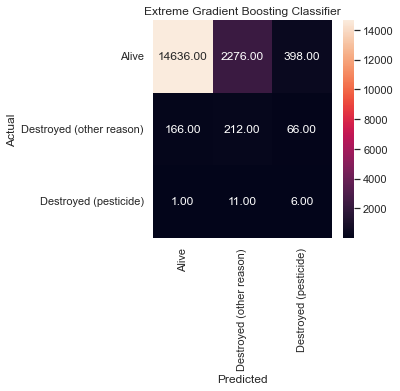

In [116]:
print(classification_report(y_test, xgb_model.predict(X_test)))
y_pred = xgb_model.predict(X_test)
from sklearn.metrics import confusion_matrix
xgb_cm = confusion_matrix(y_pred, y_test)
sns.heatmap(xgb_cm, annot=True, fmt='.2f',xticklabels = ["Alive", "Destroyed (other reason)", "Destroyed (pesticide)"] , yticklabels = ["Alive", "Destroyed (other reason)", "Destroyed (pesticide)"])
sns.set(rc={'figure.figsize':(4,4)})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Extreme Gradient Boosting Classifier')

Extreme Gradient Boosting appears to have the highest accuracy out of all the classifiers used. Hence, it is the most appropriate model for this classification.

### Cross Validation

K-fold Cross validation is then performed to check if the Extreme Gradient Boosting classifier overfits the dataset. Here, k=10 is used to train the XGB model. 

In [117]:
from sklearn import model_selection 
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
cv_model = XGBClassifier(verbosity = 0, random_state=42)
results = model_selection.cross_val_score(cv_model, X_train, y_train, cv=kfold, scoring='accuracy')
cv_mean = results.mean()
print(f"Average accuracy of 10-fold cross-validation is {cv_mean}.")

Average accuracy of 10-fold cross-validation is 0.840038737187708.


The average accuracy with cross validation is still very close to the accuracy of Extreme Gradient Boosting classifier model.

### Most Important Features 

In [122]:
importance = xgb_model.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{}    -> {:.2f}%'.format(X.columns[index], (importance[index] *100.0)))

Pesticide_2    -> 59.08%
Pesticide_1    -> 17.01%
Number_Weeks_Used    -> 5.61%
Estimated_Insects_Count    -> 5.37%
Crop_0    -> 3.43%
Number_Doses_Week    -> 1.68%
Soil_0    -> 1.65%
Number_Weeks_Quit    -> 1.52%
Season_1    -> 1.23%
Season_2    -> 1.23%
Season_3    -> 1.17%
Pesticide_3    -> 1.01%
Soil_1    -> 0.00%
Crop_1    -> 0.00%
